## Wanneer laad ik mijn smartphone op?

### Set up


We weten dat de batterijlading van een smartphone sterk daalt als je hem veel gebruikt. Nu willen we dit in kaart brengen. We hebben een aantal testexemplaren volledig opgeladen en geven deze mee met personen die de smartphones gebruiken. Wanneer de batterijlading op 20% komt, noteren de personen het aantal uren standby en het aantal uren gebruikt. Je vindt deze data in "smartphones.csv".

1. lees de data in. Hoeveel rijen zijn er?

In [ ]:
import pandas as pd

smartphones = pd.read_csv('../datasets/smartphones.csv')
smartphones.head()
smartphones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   usage    100 non-null    float64
 1   standby  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


2. Bereken per toestel het totaal aantal uren dat deze aan stond tot 20% (gebruikte uren en standby uren). Hoeveel uren vind je voor het eerste toestel?

In [ ]:
smartphones['totaal_uren'] = smartphones['usage'] + smartphones['standby']
smartphones.totaal_uren.head()

0    96.505727
1    32.842474
2    76.288917
3    67.668147
4    96.769642
Name: totaal_uren, dtype: float64

3. We zoeken nu een verband tussen het aantal uren dat de smartphone gebruikt werd en het totaal aantal uren totdat de batterij op 20% stond. Maak eerst een scatterplot van deze 2 variabelen. Wat zie je?

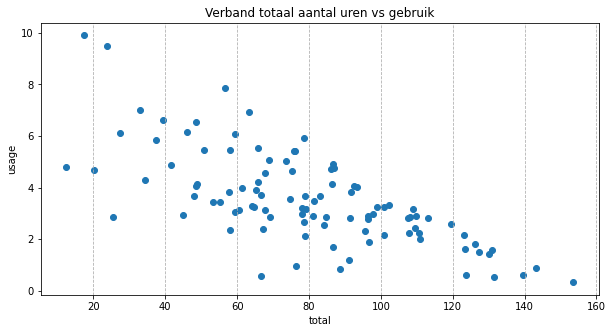

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(smartphones.totaal_uren, smartphones.usage)
ax.set_title('Verband totaal aantal uren vs gebruik')
ax.set_xlabel('total')
ax.set_ylabel('usage')
_ = ax.grid(linestyle='--', axis='x')

4. Bereken de correlatie volgens Pearson en Kendall. Wat zeggen deze waarden?

In [ ]:
print(smartphones.totaal_uren.corr(smartphones.usage, method='pearson'))
smartphones.totaal_uren.corr(smartphones.usage, method='kendall')
# er is een negatief verband, want de correlatiecoëfficiënt is negatief.
# dit betekent dat de het totaal aantal uren afneemt naarmate het verbruik toeneemt of vice versa

-0.6969470236980841


-0.5175757575757577

5. Teken de regressielijn bij de scatterplot. Wat zijn de waarden voor slope en intercept?

slope = [-0.04234725]
intercept = 6.927772435846966
usage(totaal aantal uren) = -0.042347 • totaal aantal uren + 6.927772


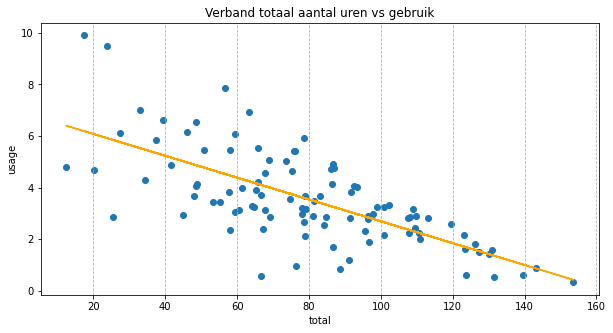

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = smartphones.totaal_uren.to_numpy().reshape(-1, 1)
y = smartphones.usage.to_numpy()
model.fit(X, y)
model.score(X, y)

print('slope =', model.coef_)
print('intercept =', model.intercept_)
print(f'usage(totaal aantal uren) = {model.coef_[0]:f} • totaal aantal uren + {model.intercept_:f}')
y_hat = model.predict(X)

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(smartphones.totaal_uren, smartphones.usage)
ax.plot(smartphones.totaal_uren, y_hat, color='orange')
ax.set_title('Verband totaal aantal uren vs gebruik')
ax.set_xlabel('total')
ax.set_ylabel('usage')
_ = ax.grid(linestyle='--', axis='x')

6. Wat is de waarde van R²? Wat is de betekenis?

In [ ]:
from sklearn.metrics import r2_score

r2_score(y, y_hat)
# maar 48% van de variantie in y wordt verklaard door ons lineaire regressie model

0.4857351538416178

7. Wat is de standaardschattingsfout? Wat betekent dit?

In [ ]:
import numpy as np

print('se =', np.sqrt(((y - y_hat) ** 2).mean()))
# dit betekent dat het model er gemiddelde 1.3u naast zit qua voorspelling

se = 1.3014982108471536


8. Als iemand een smartphone gedurende 3 uur nodig heeft, hoe lang zal het dan duren vooraleer de smartphone opgeladen moet worden?

$y(x) = a\cdot x + b$

met  $a = -0.04234725$ en $b = 6.927772435846967$

$x = \frac{y(x) - b}{a}$


$x = \frac{3 - (6.927772435846967)}{-0.04234725} $

In [ ]:
x = (3 - 6.927772435846967) / -0.04234725
print('x =', x)

x = 92.75153488944302


9. Stel dat je een verband zoekt tussen het gebruikspercentage en de totale tijd voordat je moet opladen. Zoek de juiste variabelen en maak een scatterplot. Wat zie je? Kan je hiervoor lineaire regressie gebruiken? Waarom wel of niet? Welk regressiemodel is in dit geval het beste? Wat is dan de uiteindelijke formule voor het model?

In [ ]:
from oefeningen.scripts.hulpfuncties import *

smartphones['gebruikspercentage'] = smartphones.usage / smartphones.totaal_uren
x = smartphones.totaal_uren.to_numpy()
y = smartphones.gebruikspercentage.to_numpy()

model1 = GeneralRegression()
model1.fit(x, y)

model2 = GeneralRegression(degree=2)
model2.fit(x, y)

model3 = GeneralRegression(degree=3)
model3.fit(x, y)

model4 = GeneralRegression(log=True)
model4.fit(x, y)

model5 = GeneralRegression(exp=True)
model5.fit(x, y)

pd.DataFrame([model1.r2_score, model2.r2_score, model3.r2_score, model4.r2_score, model5.r2_score],
             index=['lineair', 'kwadratisch', 'kubisch', 'logaritmisch', 'exponentieel'],
             columns=['R²']).sort_values(by='R²')

,R²
lineair,0.499673
logaritmisch,0.714612
kwadratisch,0.725587
exponentieel,0.793184
kubisch,0.803977


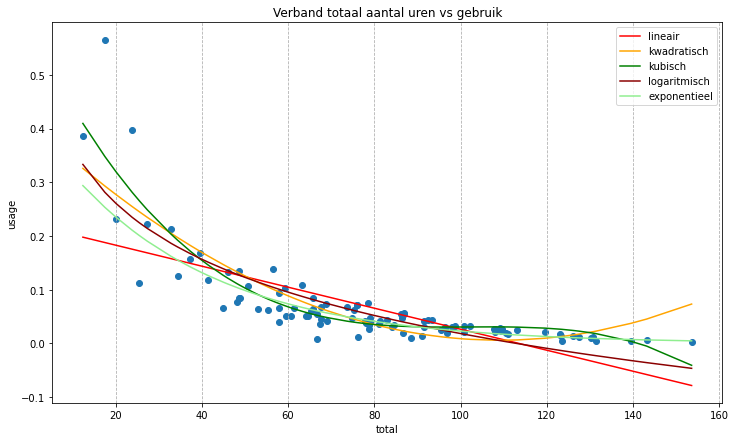

In [ ]:
x = np.sort(smartphones.totaal_uren)
y_hat_1 = model1.predict(x)
y_hat_2 = model2.predict(x)
y_hat_3 = model3.predict(x)
y_hat_4 = model4.predict(x)
y_hat_5 = model5.predict(x)

fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(smartphones.totaal_uren, smartphones.gebruikspercentage)
ax.plot(x, y_hat_1, color='red', label='lineair')
ax.plot(x, y_hat_2, color='orange', label='kwadratisch')
ax.plot(x, y_hat_3, color='green', label='kubisch')
ax.plot(x, y_hat_4, color='darkred', label='logaritmisch')
ax.plot(x, y_hat_5, color='lightgreen', label='exponentieel')
ax.set_title('Verband totaal aantal uren vs gebruik')
ax.set_xlabel('total')
ax.set_ylabel('usage')
ax.grid(linestyle='--', axis='x')
_ = ax.legend()
